In [1]:
import pandas as pd

In [2]:
file_path = 'Processed Dataset G1 and G2.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Facilitating Condition  Subjective Norms  Organizational Justice  \
 0                     3.0              3.00                     3.0   
 1                     2.0              1.00                     2.0   
 2                     3.0              2.00                     2.5   
 3                     1.0              1.25                     1.5   
 4                     3.0              3.00                     2.0   
 
    Attitude toward Cyberslacking  Cyberslacking Self-Efficacy  \
 0                            3.0                         3.00   
 1                            1.0                         1.25   
 2                            2.0                         2.00   
 3                            1.0                         1.00   
 4                            3.0                         3.00   
 
    Conscientiousness  Personality Traits  Job Stress  Cyberslacking  \
 0                3.0            3.000000        3.00            3.0   
 1                2.0   

In [3]:
# Descriptive statistics for 'Cyberslacking' and 'Increased Security Risk'
descriptive_stats = data[['Cyberslacking', 'Increased Security Risk']].describe()

# Correlation matrix for 'Cyberslacking' and 'Increased Security Risk'
correlation_matrix = data[['Cyberslacking', 'Increased Security Risk']].corr()

descriptive_stats, correlation_matrix

(       Cyberslacking  Increased Security Risk
 count      95.000000                95.000000
 mean        2.202105                 1.657895
 std         0.680735                 0.634819
 min         1.000000                 1.000000
 25%         1.800000                 1.000000
 50%         2.200000                 1.500000
 75%         2.800000                 2.000000
 max         3.000000                 3.000000,
                          Cyberslacking  Increased Security Risk
 Cyberslacking                 1.000000                 0.356177
 Increased Security Risk       0.356177                 1.000000)

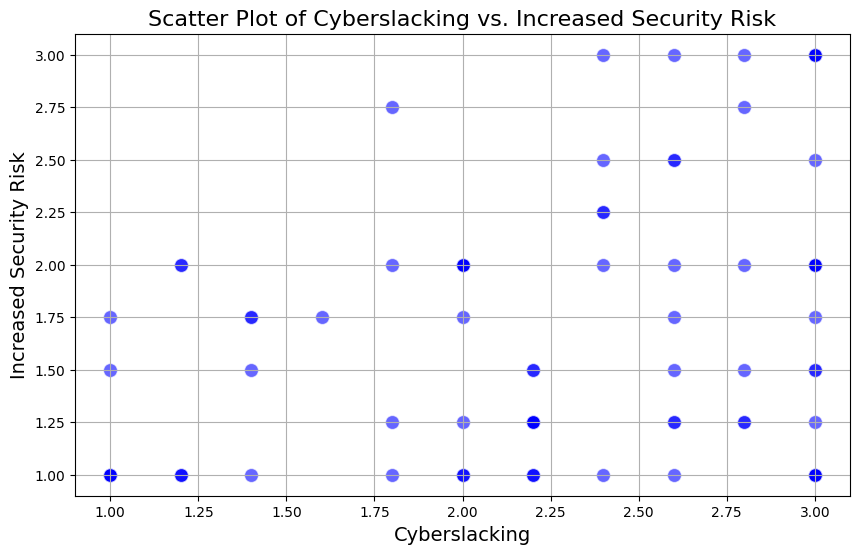

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Scatter plot to visualize the relationship between Cyberslacking and Increased Security Risk
sns.scatterplot(data=data, x='Cyberslacking', y='Increased Security Risk', s=100, color='blue', alpha=0.6)

# Plot aesthetics
plt.title('Scatter Plot of Cyberslacking vs. Increased Security Risk', fontsize=16)
plt.xlabel('Cyberslacking', fontsize=14)
plt.ylabel('Increased Security Risk', fontsize=14)
plt.grid(True)

# Show the plot
plt.show()

C:\Users\nafem\AppData\Local\Temp\ipykernel_20896\1476831671.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax[1])


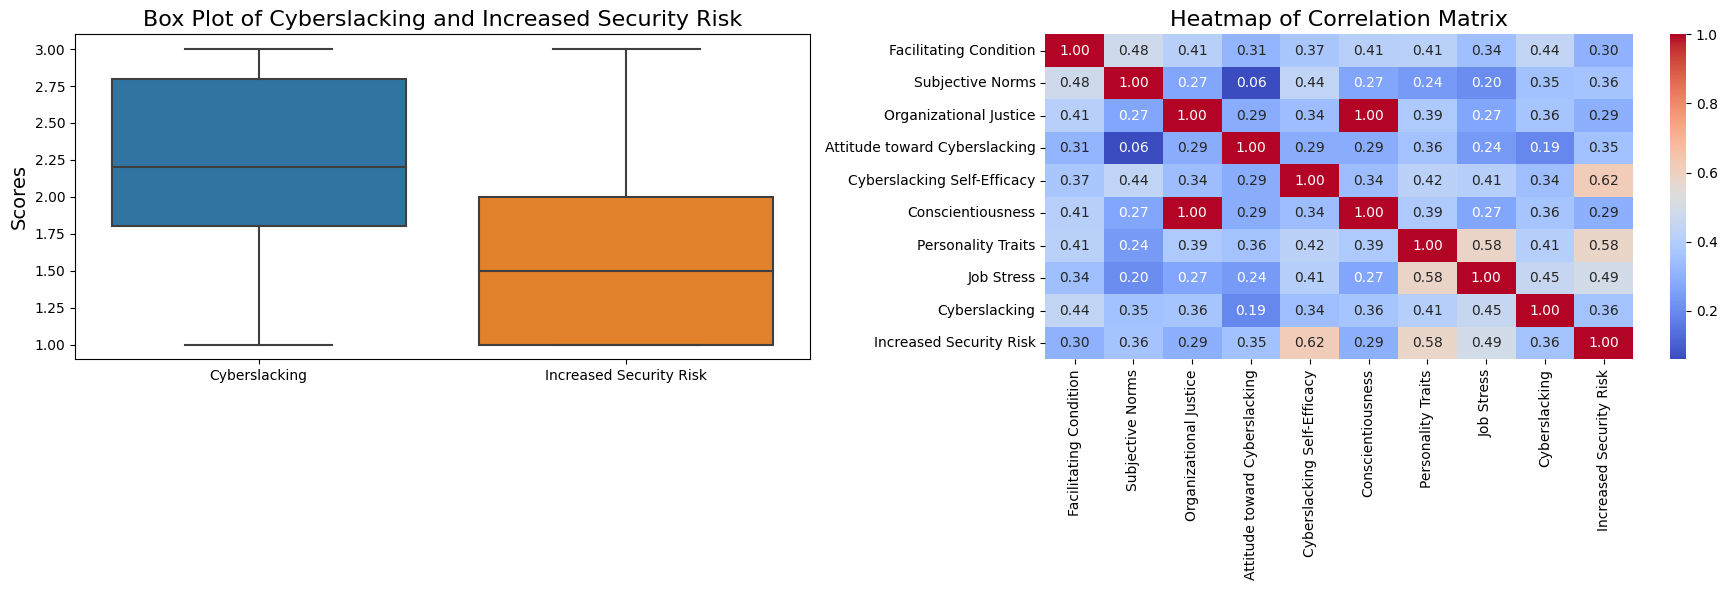

In [6]:
# Set up the matplotlib figure for multiple plots
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Box plots for Cyberslacking and Increased Security Risk
sns.boxplot(data=data[['Cyberslacking', 'Increased Security Risk']], ax=ax[0])
ax[0].set_title('Box Plot of Cyberslacking and Increased Security Risk', fontsize=16)
ax[0].set_ylabel('Scores', fontsize=14)

# Heatmap for the correlation matrix of all numerical variables in the dataset
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title('Heatmap of Correlation Matrix', fontsize=16)

# Display the plots
plt.tight_layout()
plt.show()


In [7]:
from scipy.stats import chi2_contingency

# Prepare the contingency table for 'Cyberslacking' and 'Increased Security Risk'
# We'll use crosstab to create the frequency table
contingency_table = pd.crosstab(data['Cyberslacking'], data['Increased Security Risk'])

# Perform the Chi-square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_val, dof, expected


(156.15901233428406,
 7.593265883526347e-07,
 80,
 array([[3.35789474, 1.50526316, 0.92631579, 0.81052632, 2.54736842,
         0.23157895, 0.46315789, 0.23157895, 0.92631579],
        [1.52631579, 0.68421053, 0.42105263, 0.36842105, 1.15789474,
         0.10526316, 0.21052632, 0.10526316, 0.42105263],
        [1.22105263, 0.54736842, 0.33684211, 0.29473684, 0.92631579,
         0.08421053, 0.16842105, 0.08421053, 0.33684211],
        [0.30526316, 0.13684211, 0.08421053, 0.07368421, 0.23157895,
         0.02105263, 0.04210526, 0.02105263, 0.08421053],
        [1.22105263, 0.54736842, 0.33684211, 0.29473684, 0.92631579,
         0.08421053, 0.16842105, 0.08421053, 0.33684211],
        [4.57894737, 2.05263158, 1.26315789, 1.10526316, 3.47368421,
         0.31578947, 0.63157895, 0.31578947, 1.26315789],
        [3.35789474, 1.50526316, 0.92631579, 0.81052632, 2.54736842,
         0.23157895, 0.46315789, 0.23157895, 0.92631579],
        [1.83157895, 0.82105263, 0.50526316, 0.44210526, 1.38

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Prepare the data for logistic regression
# Encoding 'Increased Security Risk' into binary outcome for simplicity (1 if value >= median, 0 otherwise)
data['Increased Security Risk Binary'] = np.where(data['Increased Security Risk'] >= data['Increased Security Risk'].median(), 1, 0)

# Predictor and response
X = data[['Cyberslacking']]  # Predictor
y = data['Increased Security Risk Binary']  # Response

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions and model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


(0.5862068965517241,
 '              precision    recall  f1-score   support\n\n           0       0.50      0.08      0.14        12\n           1       0.59      0.94      0.73        17\n\n    accuracy                           0.59        29\n   macro avg       0.55      0.51      0.44        29\nweighted avg       0.55      0.59      0.49        29\n')

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical data for regression analysis
encoder = LabelEncoder()
for column in ['Gender', 'Age', 'Education', 'Monthly Income', 'Work experience in business organization']:
    data[column] = encoder.fit_transform(data[column])

# Selecting more predictors
predictors = ['Cyberslacking', 'Gender', 'Age', 'Education', 'Monthly Income', 'Facilitating Condition',
              'Subjective Norms', 'Organizational Justice', 'Attitude toward Cyberslacking', 
              'Cyberslacking Self-Efficacy', 'Conscientiousness', 'Personality Traits', 'Job Stress']

X_multivariable = data[predictors]  # Predictor variables
y_multivariable = data['Increased Security Risk Binary']  # Response

# Split the data into training and testing sets for multivariable regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multivariable, y_multivariable, test_size=0.3, random_state=42)

# Create and fit the logistic regression model with multiple predictors
model_multi = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model_multi.fit(X_train_multi, y_train_multi)

# Predictions and model evaluation for multivariable model
y_pred_multi = model_multi.predict(X_test_multi)
accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
report_multi = classification_report(y_test_multi, y_pred_multi)

accuracy_multi, report_multi


(0.6551724137931034,
 '              precision    recall  f1-score   support\n\n           0       0.60      0.50      0.55        12\n           1       0.68      0.76      0.72        17\n\n    accuracy                           0.66        29\n   macro avg       0.64      0.63      0.63        29\nweighted avg       0.65      0.66      0.65        29\n')

In [10]:
# Reattempt to create and fit the logistic regression model with multiple predictors
try:
    model_multi.fit(X_train_multi, y_train_multi)

    # Predictions and model evaluation for multivariable model
    y_pred_multi = model_multi.predict(X_test_multi)
    accuracy_multi = accuracy_score(y_test_multi, y_pred_multi)
    report_multi = classification_report(y_test_multi, y_pred_multi)

except Exception as e:
    accuracy_multi = str(e)
    report_multi = "Error in model fitting or prediction."

accuracy_multi, report_multi


(0.6551724137931034,
 '              precision    recall  f1-score   support\n\n           0       0.60      0.50      0.55        12\n           1       0.68      0.76      0.72        17\n\n    accuracy                           0.66        29\n   macro avg       0.64      0.63      0.63        29\nweighted avg       0.65      0.66      0.65        29\n')

In [11]:
# Attempting a simpler logistic regression model with fewer predictors
simplified_predictors = ['Cyberslacking', 'Gender', 'Age', 'Education']  # Reduced number of predictors

X_simplified = data[simplified_predictors]  # Simplified predictor variables
y_simplified = data['Increased Security Risk Binary']  # Response

# Split the data into training and testing sets for simplified regression
X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simplified, y_simplified, test_size=0.3, random_state=42)

# Create and fit the logistic regression model with simplified predictors
model_simp = LogisticRegression()
try:
    model_simp.fit(X_train_simp, y_train_simp)

    # Predictions and model evaluation for simplified model
    y_pred_simp = model_simp.predict(X_test_simp)
    accuracy_simp = accuracy_score(y_test_simp, y_pred_simp)
    report_simp = classification_report(y_test_simp, y_pred_simp)

except Exception as e:
    accuracy_simp = str(e)
    report_simp = "Error in model fitting or prediction."

accuracy_simp, report_simp


(0.4827586206896552,
 '              precision    recall  f1-score   support\n\n           0       0.33      0.25      0.29        12\n           1       0.55      0.65      0.59        17\n\n    accuracy                           0.48        29\n   macro avg       0.44      0.45      0.44        29\nweighted avg       0.46      0.48      0.47        29\n')

In [12]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model setup
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Using the previously defined simplified predictors for the Decision Tree to keep it manageable
X_tree = data[simplified_predictors]
y_tree = data['Increased Security Risk Binary']

# Split the data into training and testing sets for the Decision Tree
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.3, random_state=42)

# Fit the Decision Tree model
tree_model.fit(X_train_tree, y_train_tree)

# Predictions and evaluation for the Decision Tree model
y_pred_tree = tree_model.predict(X_test_tree)
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
report_tree = classification_report(y_test_tree, y_pred_tree)

accuracy_tree, report_tree


(0.4827586206896552,
 '              precision    recall  f1-score   support\n\n           0       0.20      0.08      0.12        12\n           1       0.54      0.76      0.63        17\n\n    accuracy                           0.48        29\n   macro avg       0.37      0.42      0.38        29\nweighted avg       0.40      0.48      0.42        29\n')

In [13]:
# Mapping the encoded values back to original for clarity in results
gender_mapping = dict(enumerate(encoder.classes_))
age_mapping = dict(enumerate(encoder.classes_))
education_mapping = dict(enumerate(encoder.classes_))

# Creating subsets based on 'Gender', 'Age', 'Education'
gender_groups = data.groupby('Gender')
age_groups = data.groupby('Age')
education_groups = data.groupby('Education')

# Function to calculate correlation within groups
def calculate_group_correlations(grouped_data):
    correlations = {}
    for name, group in grouped_data:
        correlation = group[['Cyberslacking', 'Increased Security Risk']].corr().iloc[0, 1]
        correlations[name] = correlation
    return correlations

# Calculate correlations within each demographic grouping
gender_correlations = calculate_group_correlations(gender_groups)
age_correlations = calculate_group_correlations(age_groups)
education_correlations = calculate_group_correlations(education_groups)

gender_correlations, age_correlations, education_correlations


({0: 0.3420945236186069, 1: 0.3677153730568277},
 {0: 0.430050255937976,
  1: -0.148780226805185,
  2: 1.0,
  3: -0.49999999999999967,
  4: nan},
 {0: 0.564648470384042,
  1: -0.7745966692414832,
  2: nan,
  3: -0.024582710297293774})

In [16]:

# Example of filtering and calculating correlation for one group
subset = data[data['Gender'] == 'Male']  # Change 'Male' to relevant category
correlation = subset[['Cyberslacking', 'Increased Security Risk']].corr().iloc[0, 1]
print("Correlation for Males:", correlation)

# Repeat for other categories and compare


Correlation for Males: nan


In [18]:
# Define a function to calculate correlations
def calculate_correlation(data, group_by_attribute):
    unique_values = data[group_by_attribute].unique()
    results = {}
    for value in unique_values:
        subgroup = data[data[group_by_attribute] == value]
        correlation = subgroup[['Cyberslacking', 'Increased Security Risk']].corr().iloc[0, 1]
        results[value] = correlation
    return results

# Calculate correlations for each demographic
gender_corr = calculate_correlation(data, 'Gender')
age_corr = calculate_correlation(data, 'Age')
education_corr = calculate_correlation(data, 'Education')

print("Gender-based Correlations:", gender_corr)
print("Age-based Correlations:", age_corr)
print("Education-based Correlations:", education_corr)


Gender-based Correlations: {1: 0.3677153730568277, 0: 0.3420945236186069}
Age-based Correlations: {0: 0.430050255937976, 1: -0.148780226805185, 2: 1.0, 3: -0.49999999999999967, 4: nan}
Education-based Correlations: {0: 0.564648470384042, 3: -0.024582710297293774, 2: nan, 1: -0.7745966692414832}
